In [1]:
import csv as csv
import numpy as np
import pandas as pd
import seaborn as sns
import scipy.stats as stat
from ggplot import *
import fnmatch
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
%matplotlib inline

# Задача 1

Мои данные – результаты марафона в Гонконге

In [2]:
run = pd.read_csv('/Users/ola/Downloads/hong-kong-marathon-2016/challenge.csv') 

In [3]:
run.head(5)

,Overall Position,Gender Position,Category Position,Category,Race No,Country,Official Time,Net Time,10km Time,Half Way Time,30km Time
0,1,1,1,MMS,21080,Kenya,2:12:12,2:12:11,0:30:35,1:04:48,1:33:36
1,2,2,1,MMI,14,Kenya,2:12:14,2:12:13,0:30:34,1:04:48,1:33:36
2,3,3,2,MMI,2,Ethiopia,2:12:20,2:12:18,0:30:35,1:04:49,1:33:36
3,4,4,2,MMS,21077,Kenya,2:12:29,2:12:27,0:30:35,1:04:48,1:33:36
4,5,5,3,MMI,18,Ethiopia,2:12:47,2:12:46,0:30:34,1:04:48,1:33:36


Перевожу все столбцы с временем в секунды, и рассчитываю время второй половины дистанции, финишных 12 км и разницу между первой и второй половиной:

In [4]:
run['Half Way Time'].fillna('2:06:21',inplace=True) # 2:06:21 - среднее значение
run['10km Time'].fillna('1:01:10',inplace=True) # 1:10:10 - среднее значения
run['30km Time'].fillna('3:02:39',inplace=True) # 3:02:39 - среднее значение
def Time_Sec(a):
    if a == '':
        return None
    elif a == 'nan':
        return None
    else:
        hours, minutes, seconds = map(int, a.split(':'))
        return (hours*3600) + (minutes*60) + seconds
 

run['OfficialTimeSec'] = run['Official Time'].apply(Time_Sec)
run['NetTimeSec'] = run['Net Time'].apply(Time_Sec)
run['10kmSec'] = run['10km Time'].apply(Time_Sec)
run['HalfWayTimeSec'] = run['Half Way Time'].apply(Time_Sec)
run['30kmSec'] = run['30km Time'].apply(Time_Sec)

run['SecondHalfTimeSec'] = run['OfficialTimeSec'] - run['HalfWayTimeSec']
run['HalvesDifference'] = run['HalfWayTimeSec'] - run['SecondHalfTimeSec']
run['Finishing12kmSec'] = run['OfficialTimeSec'] - run['30kmSec']

Теперь считаю среднюю скорость для каждого участка дистанции:

In [5]:
run['AvSpTotal'] = 1 / (run['OfficialTimeSec'] / 42.195) * 3600
run['AvSp10km'] = 1 / (run['10kmSec'] / 10) * 3600
run['AvSpHalfWay'] = 1 / (run['HalfWayTimeSec'] / 21.0975) * 3600
run['AvSpSecondHalfWay'] = 1 / (run['SecondHalfTimeSec'] / 21.0975) * 3600
run['AvSpFinishing12kmSec'] = 1 / (run['Finishing12kmSec'] / 12) * 3600

Определяю пол участников:

In [6]:
Male_list = [fnmatch.fnmatch(item, '?M*') for item in run["Category"].tolist()]
Female_list = [fnmatch.fnmatch(item, '?F*') for item in run["Category"].tolist()]

Gender = []

for i in range(len(Male_list)):
    if Male_list[i] == True:
        Gender.insert(i, 'male')
    else:
        Gender.insert(i,'female')
        
run['Gender'] = Gender

Делю всех на четыре группы, в зависимости от результата:

In [7]:
timegroup = []

for i in range(5616):
    if run.OfficialTimeSec[i] < 10800:
        timegroup.insert(i, 'less 3 hrs')
    elif 10800 <= run.OfficialTimeSec[i] < 14400:
        timegroup.insert(i, 'less 4 hrs')
    elif 14400 <= run.OfficialTimeSec[i] < 18000:
        timegroup.insert(i, 'less 5 hrs')
    else:
        timegroup.insert(i, 'more 5 hrs')
        
run['timegroup'] = timegroup

Ещё хочу поделить всех участников по континентам:

In [8]:
run['Country '].unique()

array(['Kenya', 'Ethiopia', 'Mongolia', 'Hong Kong SAR', 'Italy',
       'Australia', 'Bahrain', 'Singapore', 'China', 'Macao SAR', 'Japan',
       'France', 'United States', 'South Africa', 'South Korea',
       'United Kingdom', 'Malaysia', 'Taiwan', 'Germany', 'Sweden',
       'Macau', 'Thailand', 'Portugal', 'Czech Republic',
       'British Indian Ocean Territory', 'Mexico', 'Chile', 'Canada',
       'Nigeria', 'Spain', 'Finland', 'Philippines', 'Brazil',
       'The Netherlands', 'India', 'Korea', 'Ireland', 'Norway',
       'Swaziland', 'Estonia', 'New Zealand', 'Indonesia', 'Mauritius',
       'Switzerland'], dtype=object)

In [9]:
Continent = []

for i in range (5616):
    if (run['Country '][i] == 'Kenya' or run['Country '][i] == 'Ethiopia' or 
        run['Country '][i] == 'South Africa' or run['Country '][i] == 'Nigeria' or 
        run['Country '][i] == 'Swaziland' or run['Country '][i] == 'Mauritius'):
        Continent.insert(i, 'Africa')
    elif (run['Country '][i] == 'Mongolia' or run['Country '][i] == 'Hong Kong SAR' or 
        run['Country '][i] == 'Bahrain' or run['Country '][i] == 'Singapore' or 
        run['Country '][i] == 'China' or run['Country '][i] == 'Macao SAR' or 
        run['Country '][i] == 'Japan' or run['Country '][i] == 'South Korea' or
        run['Country '][i] == 'Malaysia' or run['Country '][i] == 'Taiwan' or
        run['Country '][i] == 'Macau' or run['Country '][i] == 'Thailand' or
        run['Country '][i] == 'Philippines' or run['Country '][i] == 'India' or
        run['Country '][i] == 'Korea' or run['Country '][i] == 'Indonesia' or
        run['Country '][i] == 'British Indian Ocean Territory'):
        Continent.insert(i, 'Asia')
    elif (run['Country '][i] == 'Italy' or run['Country '][i] == 'France' or
        run['Country '][i] == 'United Kingdom' or run['Country '][i] == 'Germany' or
        run['Country '][i] == 'Sweden' or run['Country '][i] == 'Portugal' or
        run['Country '][i] == 'Czech Republic' or run['Country '][i] == 'Spain' or
        run['Country '][i] == 'Finland' or run['Country '][i] == 'The Netherlands' or
        run['Country '][i] == 'Ireland' or run['Country '][i] == 'Norway' or
        run['Country '][i] == 'Estonia' or run['Country '][i] == 'Switzerland'):
        Continent.insert(i, 'Europe')
    elif (run['Country '][i] == 'Australia' or run['Country '][i] == 'New Zeland'):
        Continent.insert(i, 'Australia')
    elif (run['Country '][i] == 'United States' or run['Country '][i] == 'Canada' or
        run['Country '][i] == 'Mexico'):
        Continent.insert(i, 'North America')
    elif (run['Country '][i] == 'Chile' or run['Country '][i] == 'Brazil'):
        Continent.insert(i, 'South America')
    else:
        Continent.insert(i, 'na')

run['Continent'] = Continent

In [10]:
run.head(5)

,Overall Position,Gender Position,Category Position,Category,Race No,Country,Official Time,Net Time,10km Time,Half Way Time,...,HalvesDifference,Finishing12kmSec,AvSpTotal,AvSp10km,AvSpHalfWay,AvSpSecondHalfWay,AvSpFinishing12kmSec,Gender,timegroup,Continent
0,1,1,1,MMS,21080,Kenya,2:12:12,2:12:11,0:30:35,1:04:48,...,-156,2316,19.150530,19.618529,19.534722,18.781157,18.652850,male,less 3 hrs,Africa
1,2,2,1,MMI,14,Kenya,2:12:14,2:12:13,0:30:34,1:04:48,...,-158,2318,19.145702,19.629226,19.534722,18.771873,18.636756,male,less 3 hrs,Africa
2,3,3,2,MMI,2,Ethiopia,2:12:20,2:12:18,0:30:35,1:04:49,...,-162,2324,19.131234,19.618529,19.529699,18.748704,18.588640,male,less 3 hrs,Africa
3,4,4,2,MMS,21077,Kenya,2:12:29,2:12:27,0:30:35,1:04:48,...,-173,2333,19.109574,19.618529,19.534722,18.702536,18.516931,male,less 3 hrs,Africa
4,5,5,3,MMI,18,Ethiopia,2:12:47,2:12:46,0:30:34,1:04:48,...,-191,2351,19.066399,19.629226,19.534722,18.620005,18.375160,male,less 3 hrs,Africa


Всё! Тепреь можно строить :)

Посчитаем, сколько участников было в каждой категории

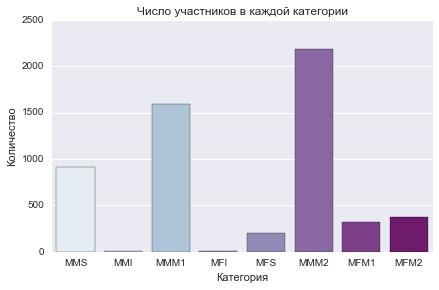

In [11]:
sns.factorplot(x='Category', data=run, kind="count",
                   palette="BuPu", aspect=1.5)
sns.plt.title('Число участников в каждой категории')
plt.xlabel('Категория')
plt.ylabel('Количество')

Из гистограммы видно, что больше всего участников было в категориях MMM1 и MMM2. Скорее всего, в эти группы входят мужчины-любители. Как правило, на забегах эти категории оказываются самыми массовыми.

* Посмотрим, как было распределено время участников в каждой категории, а заодно и выясним, верна ли гипотеза про категории MMM1 и MMM2

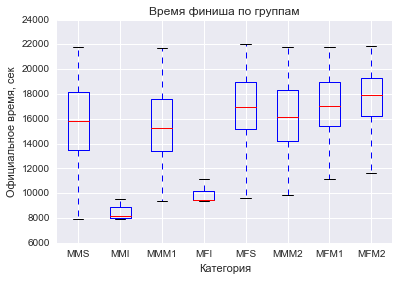

In [12]:
with sns.axes_style('darkgrid'):
    plt.boxplot([run[run['Category']=='MMS']['OfficialTimeSec'],run[run['Category']=='MMI']['OfficialTimeSec'],
               run[run['Category']=='MMM1']['OfficialTimeSec'],run[run['Category']=='MFI']['OfficialTimeSec'],
               run[run['Category']=='MFS']['OfficialTimeSec'],run[run['Category']=='MMM2']['OfficialTimeSec'],
               run[run['Category']=='MFM1']['OfficialTimeSec'],run[run['Category']=='MFM2']['OfficialTimeSec']], 
                labels=run['Category'].unique())
    
plt.title('Время финиша по группам')
plt.xlabel('Категория')
plt.ylabel('Официальное время, сек')

Действительно, наименьший разброс по времени и самые лучшие результаты показали спортсмены в группах 2 - MMI и 4 - MFI. Значит, эти категории представлены спортсменами-профессионалами, в то время как все остальные участники – любители, в том числе и MMM1, MMM2.

А правда ли, что мужчины бегают намнооого быстрее женщин?

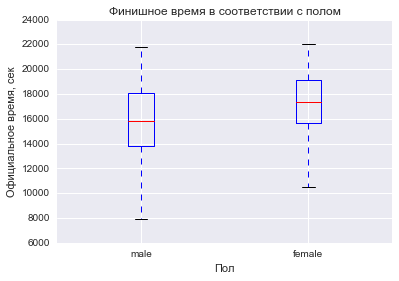

In [13]:
with sns.axes_style('darkgrid'):
    plt.boxplot([run[run['Gender']=='male']['OfficialTimeSec'],run[run['Gender']=='female']['OfficialTimeSec']],
               labels=run['Gender'].unique())
plt.title('Финишное время в соответствии с полом')
plt.xlabel('Пол')
plt.ylabel('Официальное время, сек')

Правда :( Самый быстрый спортсмен-мужчина обгоняет самую быструю бегунью более, чем на полчаса. Примерно такой же разрыв виден и в медианах. Ну хотя бы самая медленная женщина, не сильно отстала от самого медленного мужчины!

Но, может, не всё потеряно?

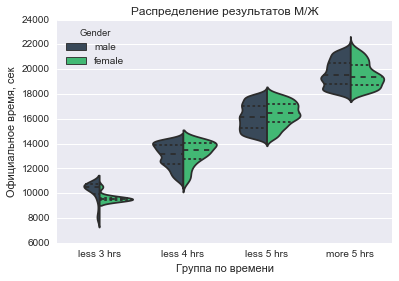

In [14]:
sns.violinplot(x="timegroup", y="OfficialTimeSec", hue="Gender", data=run, split=True,
               inner="quart", palette={"male": "#34495e", "female": "#2ecc71"})
sns.despine(right=True)
plt.title('Распределение результатов М/Ж')
plt.xlabel('Группа по времени')
plt.ylabel('Официальное время, сек')

Ну вот! В двух из четырёх групп медианное время женщин ниже (жаль только, что в этих группах людей почти нет)

Построим-ка все возможные гистограммы распределения времени и скоростей!

In [15]:
run.columns

Index(['Overall Position', 'Gender Position', 'Category Position', 'Category',
       'Race No', 'Country ', 'Official Time', 'Net Time', '10km Time',
       'Half Way Time', '30km Time', 'OfficialTimeSec', 'NetTimeSec',
       '10kmSec', 'HalfWayTimeSec', '30kmSec', 'SecondHalfTimeSec',
       'HalvesDifference', 'Finishing12kmSec', 'AvSpTotal', 'AvSp10km',
       'AvSpHalfWay', 'AvSpSecondHalfWay', 'AvSpFinishing12kmSec', 'Gender',
       'timegroup', 'Continent'],
      dtype='object')

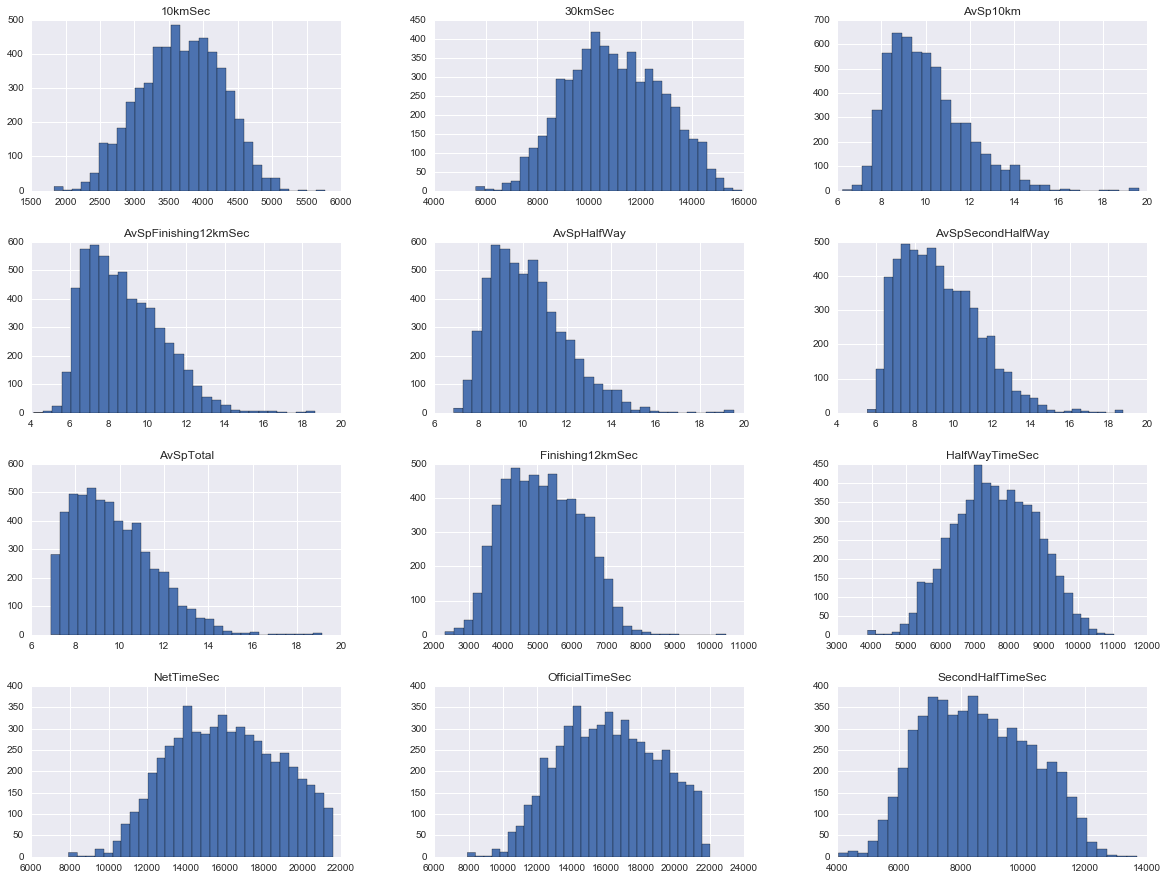

In [16]:
run_time_speed = run[['OfficialTimeSec', 'NetTimeSec', '10kmSec', 'HalfWayTimeSec', '30kmSec', 'SecondHalfTimeSec', 
                     'Finishing12kmSec', 'AvSpTotal', 'AvSp10km','AvSpHalfWay', 'AvSpSecondHalfWay', 
                     'AvSpFinishing12kmSec']]

run_time_speed.hist(bins=30, figsize=(20,15))
plt.show()

А теперь подробнее!

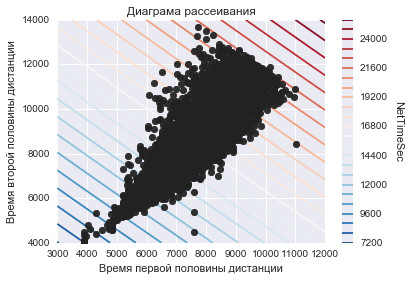

In [17]:
sns.plt.title('Диаграма рассеивания')
sns.set(style="darkgrid")
sns.interactplot(x1='HalfWayTimeSec', x2='SecondHalfTimeSec', y='NetTimeSec', data=run)
plt.xlabel('Время первой половины дистанции')
plt.ylabel('Время второй половины дистанции')

Выходит, что людей замедлившихся во второй части пути значительно больше тех, кто хотя бы сумел поддержать то же время. А на сколько?

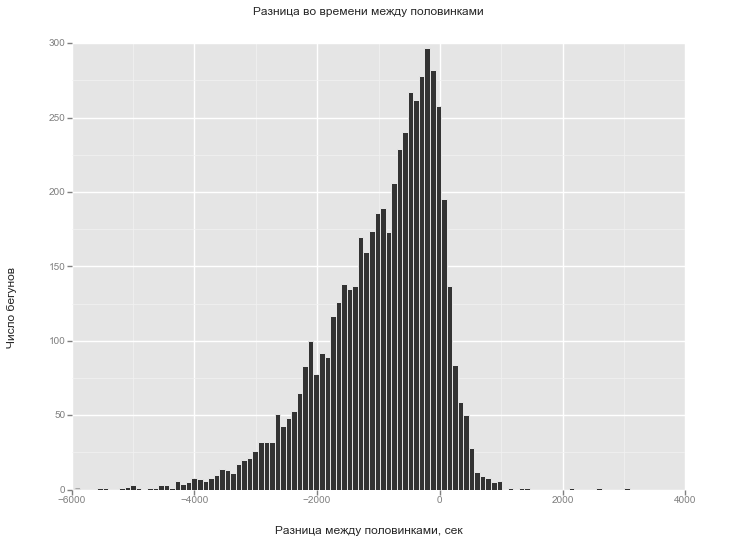

<ggplot: (-9223372036554510620)>

In [18]:
ggplot(aes(x='HalvesDifference'), data=run) + geom_histogram(bins=100) + labs(x = 'Разница между половинками, сек', 
                                                                              y = 'Число бегунов', title = 'Разница во времени между половинками')

Гистограмма очень сильно смещена влево относительно нуля, значит, действительно, людей, не сумевших выдержать верную стратегию, оказалось в разы больше:

In [19]:
np.sum(run['HalvesDifference']>0)

642

642 человека из 5616 выдержали темп! Соотвественно тех, кто замедлился почтив 8 раз больше

In [20]:
(5616 - 642) / 642

7.747663551401869

* Если так много людей замедлились после 21 км, то, веротяно, они бежали слишком быстро и первые 10 км. Проверяем!

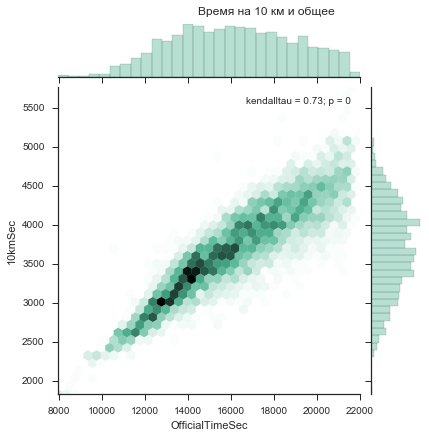

In [21]:
from scipy.stats import kendalltau
sns.set(style="ticks")
sns.jointplot(x=run['OfficialTimeSec'], y=run['10kmSec'], kind="hex", stat_func=kendalltau, color="#4CB391")
plt.title('Время на 10 км и общее', y=1.22, x=-2)

Действительно, точки смещаются правее, а значит, первую десятку большинсвто участников бежало быстрее, чем в среднем всю дистанцию. Посмотрим, что там с темпом.

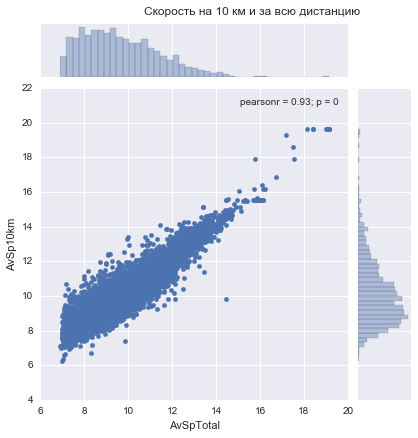

In [22]:
sns.set_style("darkgrid")
sns.jointplot(data=run, x='AvSpTotal', y='AvSp10km')
plt.title('Скорость на 10 км и за всю дистанцию', y=1.22, x=-2)

Всё подтверждается! Приблизительно стабильную скорость, в основном, могли поддержать спортсмены-профессионалы (из правого верхнего угла), а среди любителей много таких, кто чрезмерно ускорился в начале.

Думаю, это будет более заметно при сравнении скоростей в самом начале пути и в самом конце.

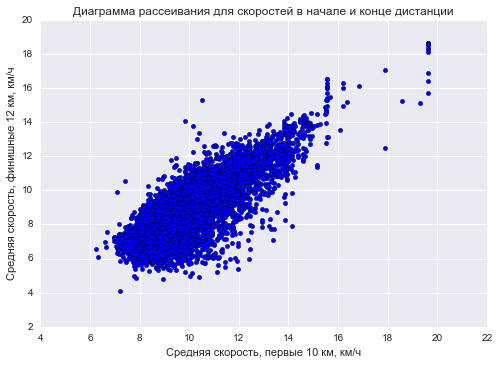

In [23]:
sns.plt.title('Диаграмма рассеивания для скоростей в начале и конце дистанции')
plt.scatter(run['AvSp10km'],run['AvSpFinishing12kmSec'])
plt.xlabel('Средняя скорость, первые 10 км, км/ч')
plt.ylabel('Средняя скорость, финишные 12 км, км/ч')

Разброс действительно выглядит более сильным. Что тут скажешь? Надо лучше готовиться!

Считается, что самые лучшие бегуны родом из Африки. На этом марафоне их было не слишком много, но всё равно интересно, какая у них была тактика!

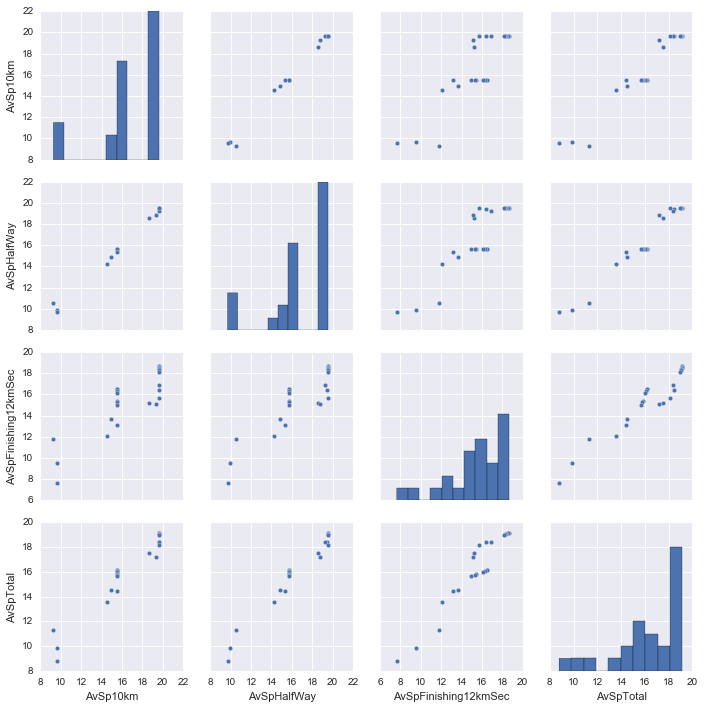

In [24]:
sns.pairplot(run[(run.Continent == 'Africa')][[ 'AvSp10km', 'AvSpHalfWay', 'AvSpFinishing12kmSec','AvSpTotal']]);

Видно, что лидеры пытались ускориться в конце, преодолевая остальную часть дистанции с приблизительно постоянным темпом, а это и есть лучшая стратегия!

# Задача 2

## Пункт 1

In [25]:
X = stat.uniform(loc=0,scale=1)

In [26]:
values1 = X.rvs(1000000)

/Users/ola/anaconda/lib/python3.5/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


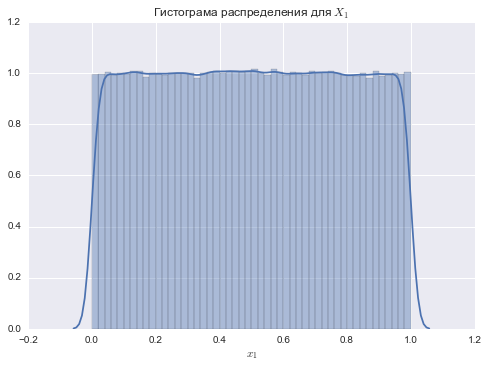

In [27]:
sns.plt.title('Гистограма распределения для $X_1$')
sns.distplot(values1, axlabel='$x_1$')

In [28]:
values2 = X.rvs(1000000)
values3 = X.rvs(1000000)

/Users/ola/anaconda/lib/python3.5/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


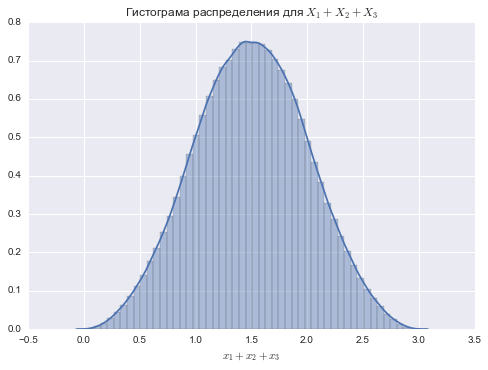

In [29]:
sns.plt.title('Гистограма распределения для $X_1+X_2+X_3$')
sns.distplot(values1+values2+values3, axlabel='$x_1 + x_2 + x_3$')

/Users/ola/anaconda/lib/python3.5/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


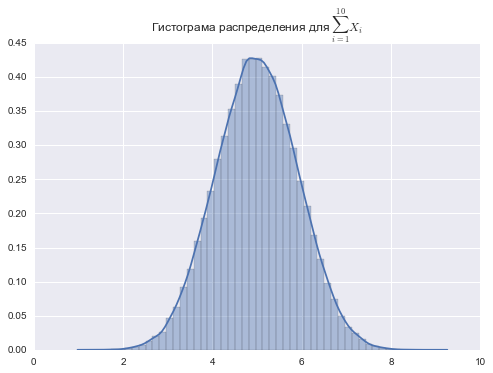

In [30]:
sumvalues10 = np.empty(shape=100000)
for i in range(10):
    values10 = X.rvs(100000)
    sumvalues10 += values10
    
sns.plt.title('Гистограма распределения для $\sum_{i=1}^{10} X_i$', y=1.02)
sns.distplot(sumvalues10)

/Users/ola/anaconda/lib/python3.5/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


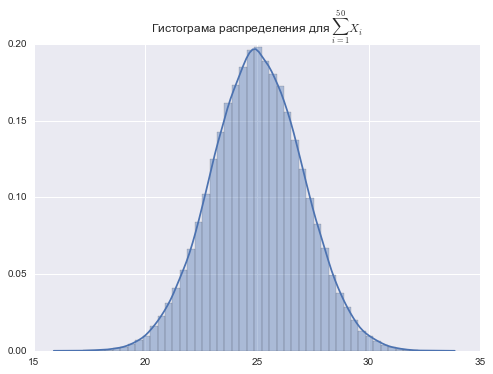

In [37]:
sumvalues50 = np.empty(shape=100000)
for i in range(50):
    values = X.rvs(100000)
    sumvalues50 += values
    
sns.plt.title('Гистограма распределения для $\sum_{i=1}^{50} X_i$', y=1.02)
sns.distplot(sumvalues50)

## Пункт 2

$P(X_1+X_2+X_3>2)$

In [32]:
S = values1+values2+values3
np.sum(S > 2) / 1000000

0.165905

## Пункт 3

* $E(X_1^5)$

In [33]:
np.mean(values1 ** 5)

0.16635973463947212

* $Var(X_1/1+X_2^2)$

In [34]:
Y = values1 / (1 + values2 ** 2)
Y.var()

0.05999912935819627

## Пункт 4

* Медиана

In [35]:
Z = (1 + values1) / (3 + values2)
np.median(Z)

0.42859884424610956

* 25%-ая квантиль

In [36]:
np.percentile(a=Z, q=25)

0.35722832482612721

# Задача 3 (номер 13 из Культурного кода)

** Условие: ** На арене две команды гладиаторов, $A$ и $B$. Команды могут отличаться по количеству гладиаторов и их силе. Игра проходит в виде последовательных турниров, в каждом из которых участвует по одному гладиатору от каждой стороны. Если в очередном турнире встречаются гладиаторы с силами $a$ и $b$, то вероятность победы первого определяется величиной $\frac{a}{a+b}$. Гладиатор, проигравший турнир, выбывает из игры, выигравший — возвращается в команду, причём у победившего гладиатора-вампира сила увеличивается на силу побеждённого им гладиатора-вампира. Гладиаторы не устают, но и не приобретают опыта. Стратегия команды предписывает, какого гладиатора выдвигать на очередной турнир в зависимости от текущего состава команд. Игра ведётся до полного выбывания из игры одной из команд.

Как выглядит оптимальная стратегия команды A?

** Решение: ** Выпишем суммарную силу каждой из команд: $A = a_1 + ... + a_n$ и $B=  b_1 + ... + b_m$

Предположим, что гладиатор из команды $A$ имеет силу $a$ и он побеждает гладиатора из $B$, сила которого была $b$. В этом случае суммарная сила первой команды увеличивается на $b$, а суммарная сила второй уменьшается на ту же величину, так как её гладиатор выбывает из игры. Однако при этом сила команд $A+B$ остаётся неизменной! Таким образом, в конце суммарная сила победителя будет $A+B$, а проигравшего – $0$.

Рассчитаем математическое ожидание выигрыша команды $A$ в очередном турнире, если она выдвинет гладиатора с силой $a$ против гладиатора с силой $b$:

$$\dfrac{a}{a+b} \cdot b + \dfrac{a}{a+b} \cdot (-a) = 0 $$

Поскольку турниры не отличаются друг от друга, для каждого математическое ожидание будет равно нулю, откуда следует, что ожидаемый выигрыш команды $A$ равен её начальной суммарной силе. Пусть $p$ – вероятность того, что выиграет команда $A$, выпишем математическое ожидание выигрыша команды $A$ во всём турнире:

$$p \cdot (A+B)+(1-p) \cdot 0=A$$

Выразив $p = \dfrac{A}{A+B}$, видим, что вероятность победы команды $A$ определяется только соотношением начальных сил обеих команд и не зависит от их стратегий.

Значит, любая стратегия команды $A$ приведёт к одному и тому же результату.